# DAV 6150 Module 5 Assignment
## Understanding Classification Model Performance Metrics
#### Author: Mahlet Melese
#### Date: June 27, 2023

## 1. Introduction
In this project, we are tasked with calculating a suite of classification model performance metrics via Python code functions that we create and then comparing our results to those of pre-built Python functions that automatically calculate those same metrics.We will also be creating graphical output via Python code that can be used to evaluate the performance of classification models.

The data set you will be using for this work is comprised of approximately 180 labeled binary observations. The classifications are either ‘0’ or ‘1’. A classification model has been used to “predict” the actual classifications for each observation, and its algorithm works by estimating the probability that the correct classification for each observation is a ‘1’. The data set includes three attributes that we will make use of for our analysis:
1) class: the actual classification for the observation
2) scored.class: the predicted classification for the observation
3) scored.probability: the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation.

## Import Libraries

In [3]:
# load numpy + 'datasets'. We'll use the "iris" data that is provided with sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

##  2. Exploratory Data Analysis 

#### Part 1. Read dataset from my github  repo and creat pandas dataframe

In [4]:
# Downloading the csv file from my GitHub repo
data_url = "https://raw.githubusercontent.com/mahletbirku/-DAV-6150/main/M5_Data.csv" 
df = pd.read_csv(data_url, header=0)
df

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491
...,...,...,...,...,...,...,...,...,...,...,...
176,5,123,74,40,77,34.1,0.269,28,0,0,0.311420
177,4,146,78,0,0,38.5,0.520,67,1,1,0.707210
178,8,188,78,0,0,47.9,0.137,43,1,1,0.888277
179,9,120,72,22,56,20.8,0.733,48,0,0,0.422468


In [5]:
# what is the dimensionality of the data?
df.shape

(181, 11)

As we can see above, we have 39644 observations comprised of 61 features. What do the features look like?

In [6]:
# display features of the dataset
df.columns

Index(['pregnant', 'glucose', 'diastolic', 'skinfold', 'insulin', 'bmi',
       'pedigree', 'age', 'class', 'scored.class', 'scored.probability'],
      dtype='object')

#### Data types of all columns

- Pandas.dtypes function helps us to display the data types of all columns as a series.

In [8]:
# Check the data types
df.dtypes

pregnant                int64
glucose                 int64
diastolic               int64
skinfold                int64
insulin                 int64
bmi                   float64
pedigree              float64
age                     int64
class                   int64
scored.class            int64
scored.probability    float64
dtype: object

####  Let's check if there is a missing value
Before answering those questions below , I checked null valus which is a fundamental part of data cleaning.

In [10]:
# recommended code 
df.isna().sum()

pregnant              0
glucose               0
diastolic             0
skinfold              0
insulin               0
bmi                   0
pedigree              0
age                   0
class                 0
scored.class          0
scored.probability    0
dtype: int64

####  Let's get some of the basic statistics of the data.

- From the table above, for each feature we can get the mean, standard deviation, count, and other basic information that can tell about the data.

In [14]:
df.describe()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,3.861878,118.303867,71.701657,19.801105,63.767956,31.577901,0.449641,33.314917,0.314917,0.176796,0.303726
std,3.236551,30.484084,11.802987,15.692326,88.734756,6.659935,0.284006,11.183582,0.465771,0.382554,0.231235
min,0.000000,57.000000,38.000000,0.000000,0.000000,19.400000,0.085000,21.000000,0.000000,0.000000,0.023228
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.300000,0.257000,24.000000,0.000000,0.000000,0.117024
50%,3.000000,112.000000,70.000000,22.000000,0.000000,31.600000,0.391000,30.000000,0.000000,0.000000,0.239994
75%,6.000000,136.000000,78.000000,32.000000,105.000000,36.000000,0.580000,41.000000,1.000000,0.000000,0.430926
max,15.000000,197.000000,104.000000,54.000000,543.000000,50.000000,2.288000,67.000000,1.000000,1.000000,0.946334


**Here, we have 181 counts, for all the  attributes for the final analysis.**

### Data Visualization

Let's create the default pairplot just to see how each features looks like

In [15]:
df

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491
...,...,...,...,...,...,...,...,...,...,...,...
176,5,123,74,40,77,34.1,0.269,28,0,0,0.311420
177,4,146,78,0,0,38.5,0.520,67,1,1,0.707210
178,8,188,78,0,0,47.9,0.137,43,1,1,0.888277
179,9,120,72,22,56,20.8,0.733,48,0,0,0.422468


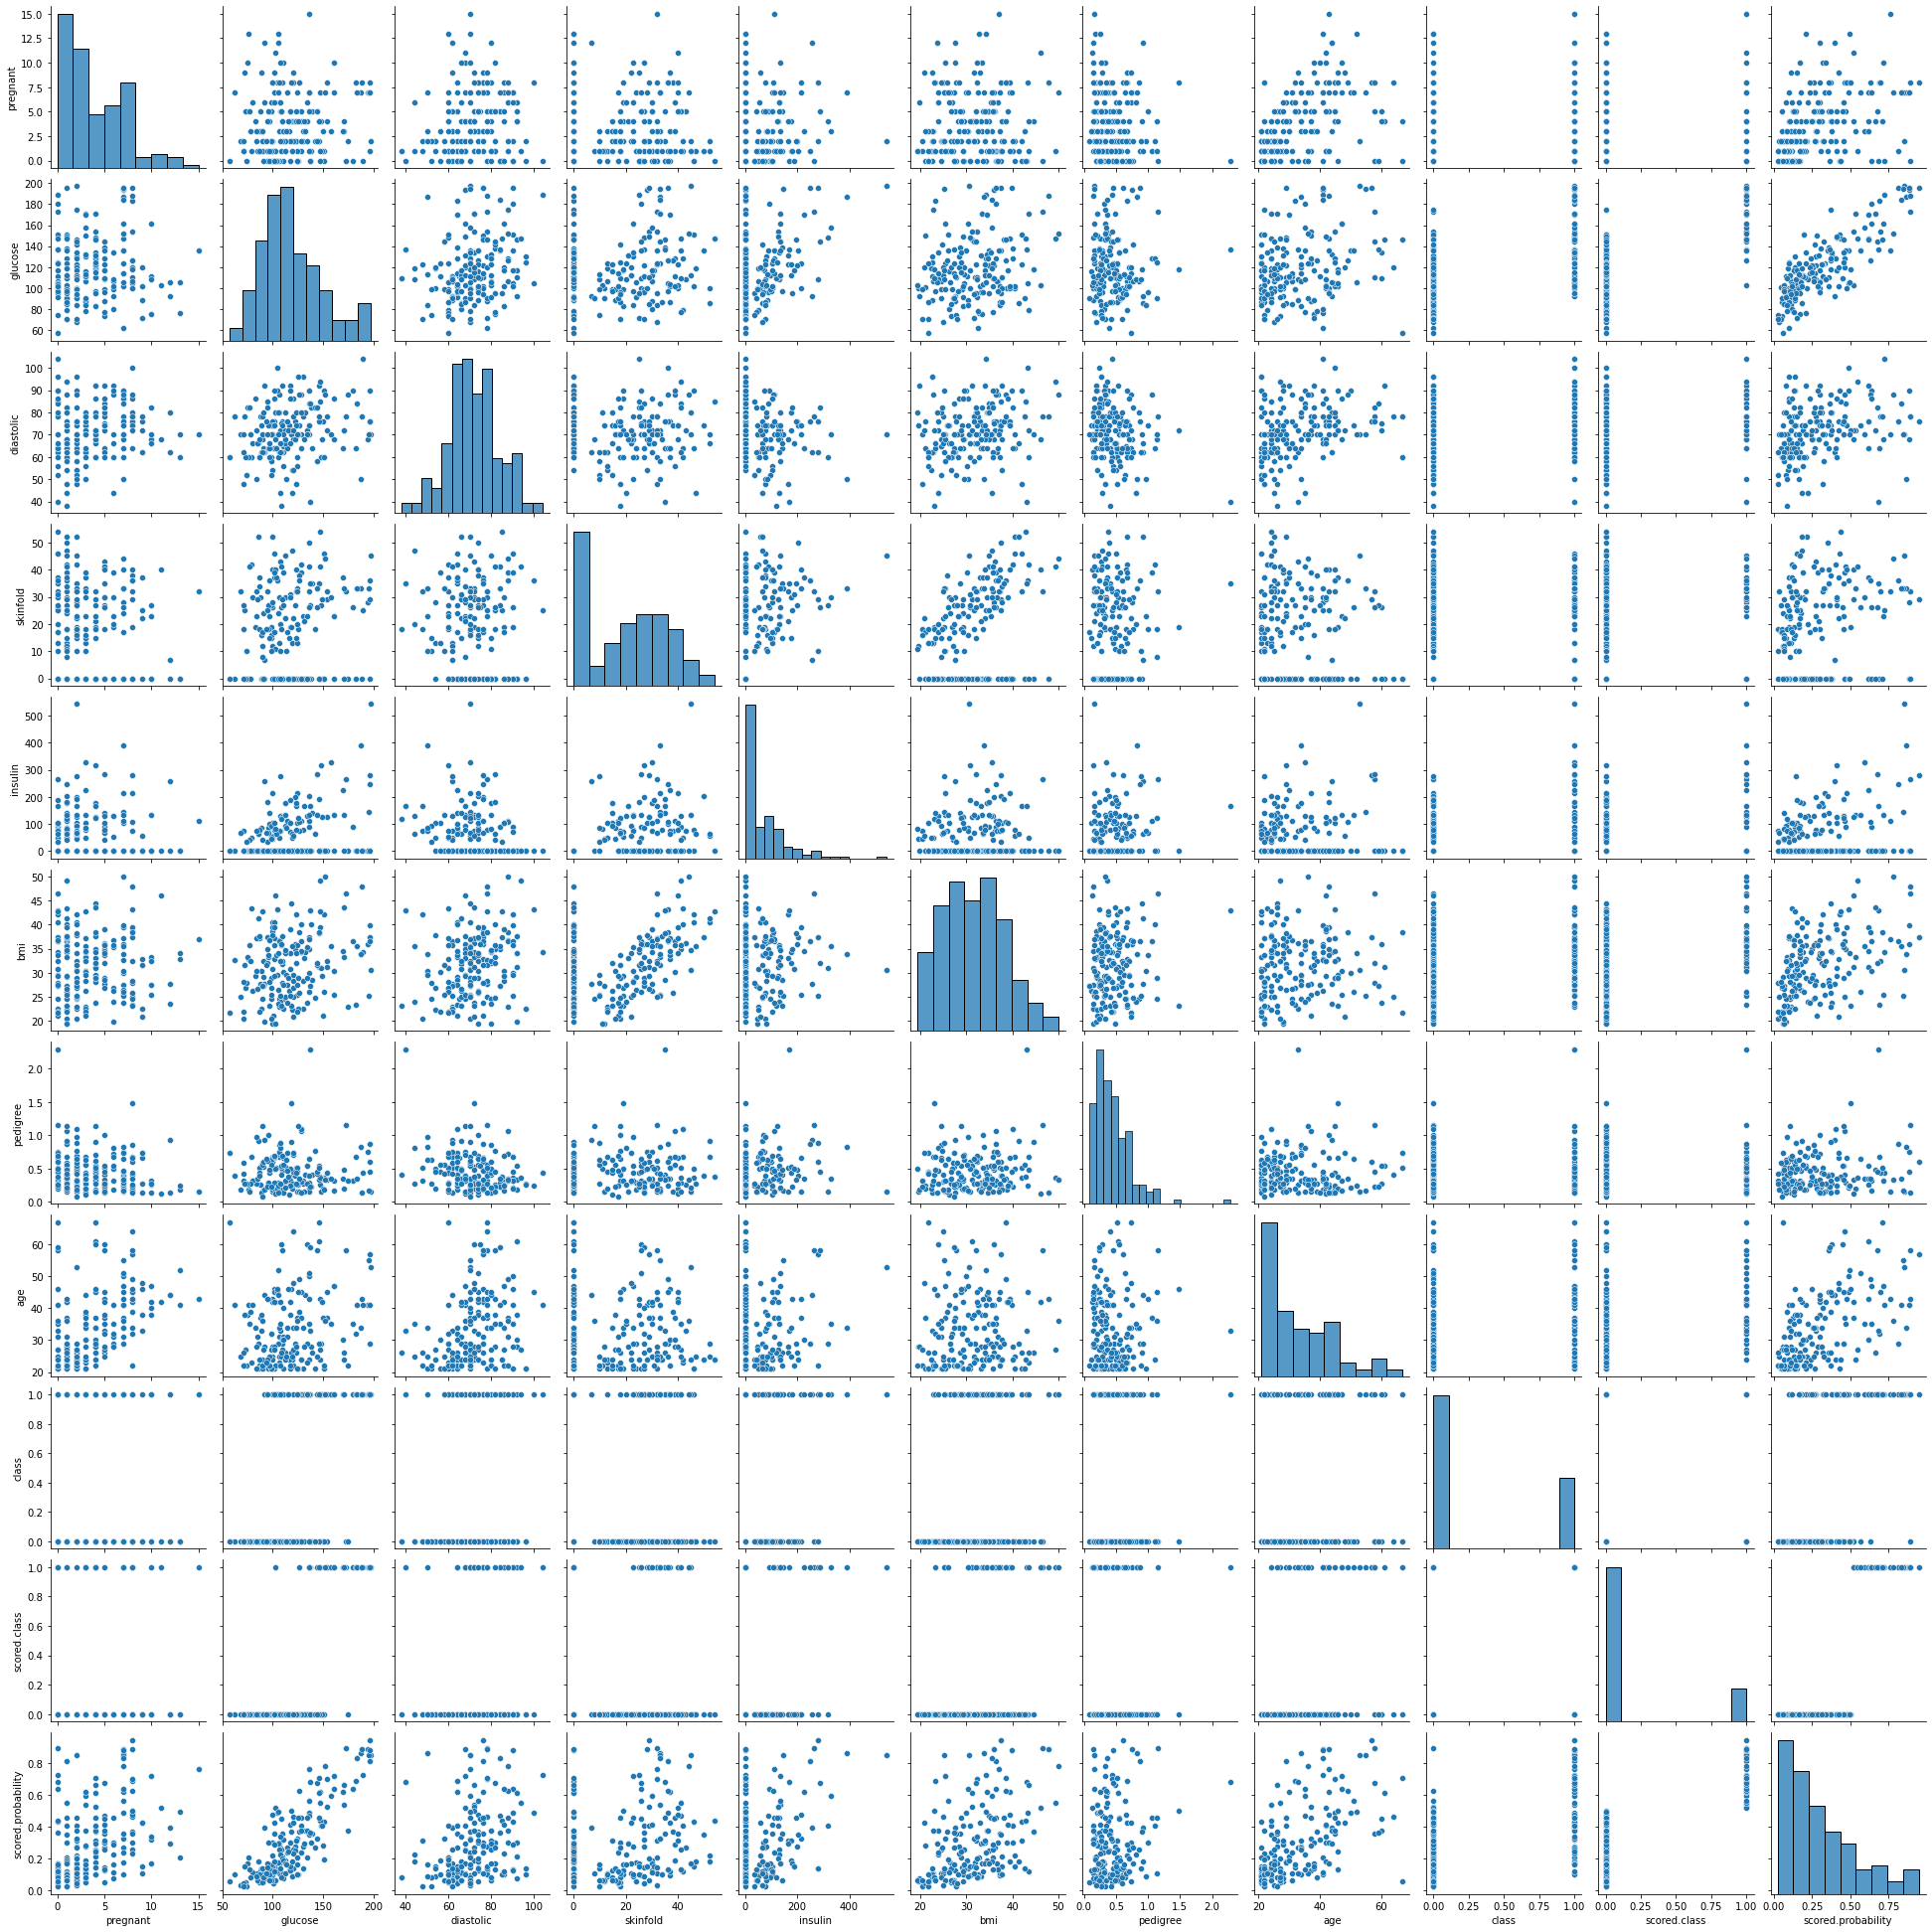

In [16]:
# Seaborn visualization library
import seaborn as sns

sns.pairplot(df)

- The above plot is part of the explanatory data anlysis approach just to see what each feature looks like with eachother.